<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/construct_dataset_280621.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install harperdb


In [2]:
import harperdb
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
url='https://ce901data-orc0770.harperdbcloud.com'
db=harperdb.HarperDB(url=url,
            username='myuser',
            password='abcdef',
            timeout=500)

In [4]:
db

In [17]:

sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE num_of_beds>0'
my_db_data=db.sql(sqlstring)
data=pd.DataFrame(my_db_data)
data

,id,num_of_beds,price_paid,town,district,estate_type,property_type
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F
1,666758D7-6CCD-3363-E053-6B04A8C0D74E,3,205000,LEAMINGTON SPA,WARWICK,F,T
2,666758D7-37D9-3363-E053-6B04A8C0D74E,4,800000,ORPINGTON,BROMLEY,F,D
3,68FEB20C-11C5-38DA-E053-6C04A8C051AE,3,650000,CARDIFF,CARDIFF,F,T
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T
...,...,...,...,...,...,...,...
29618,68FEB20B-50B9-38DA-E053-6C04A8C051AE,3,275000,BOURNEMOUTH,BOURNEMOUTH,F,S
29619,666758D6-AF49-3363-E053-6B04A8C0D74E,2,58000,CROOK,COUNTY DURHAM,F,T
29620,666758D7-39B2-3363-E053-6B04A8C0D74E,3,441000,BROMLEY,BROMLEY,F,S
29621,666758D7-68EC-3363-E053-6B04A8C0D74E,2,133500,CARDIFF,CARDIFF,L,F


In [18]:
points=data['district'].unique()
points.sort()
print(len(points))


187


In [19]:
for x in points:
  data[x]=data['district']
data

,id,num_of_beds,price_paid,town,district,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,...,SOUTH DERBYSHIRE,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,...,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
1,666758D7-6CCD-3363-E053-6B04A8C0D74E,3,205000,LEAMINGTON SPA,WARWICK,F,T,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,...,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK,WARWICK
2,666758D7-37D9-3363-E053-6B04A8C0D74E,4,800000,ORPINGTON,BROMLEY,F,D,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,...,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY,BROMLEY
3,68FEB20C-11C5-38DA-E053-6C04A8C051AE,3,650000,CARDIFF,CARDIFF,F,T,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,...,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF,CARDIFF
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,

In [20]:
for x in points:
  data[x]=data.district.str.contains(x,case=False)
  data[x]=data[x].astype(int)
data


,id,num_of_beds,price_paid,town,district,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,...,SOUTH DERBYSHIRE,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST
0,64342BFE-1DD5-422C-E053-6C04A8C0FB8A,2,222000,CHELMSFORD,CHELMSFORD,L,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,666758D7-6CCD-3363-E053-6B04A8C0D74E,3,205000,LEAMINGTON SPA,WARWICK,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,666758D7-37D9-3363-E053-6B04A8C0D74E,4,800000,ORPINGTON,BROMLEY,F,D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,68FEB20C-11C5-38DA-E053-6C04A8C051AE,3,650000,CARDIFF,CARDIFF,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,68FEB20B-6AA7-38DA-E053-6C04A8C051AE,4,280000,COLCHESTER,COLCHESTER,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,68FEB20B-50B9-38DA-E053-6C04A8C051AE,3,275000,BOURNEMOUTH,BOURNEMOUTH,F,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29619,666758D6-AF49-3363-E053-6B04A8C0D74E,2,58000,CROOK,COUNTY DURHAM,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29620,666758D7-39B2-3363-E053-6B04A8C0D74E,3,441000,BROMLEY,BROMLEY,F,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29621,666758D7-68EC-3363-E053-6B04A8C0D74E,2,133500,CARDIFF,CARDIFF,L,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Remove columns 
data.drop(['id', 'town', 'district'],  axis='columns', inplace=True)
data


,num_of_beds,price_paid,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,CANTERBURY,CARDIFF,CARLISLE,...,SOUTH DERBYSHIRE,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST
0,2,222000,L,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,205000,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,800000,F,D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,650000,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,280000,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,3,275000,F,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29619,2,58000,F,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29620,3,441000,F,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29621,2,133500,L,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
estateTypes=data['estate_type'].unique()
estateTypes

array(['L', 'F'], dtype=object)

In [23]:
data['estate_type'] =data['estate_type'].map({'F':'2',
                             'L':'1'})
data

,num_of_beds,price_paid,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,CANTERBURY,CARDIFF,CARLISLE,...,SOUTH DERBYSHIRE,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST
0,2,222000,1,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,205000,2,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,800000,2,D,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,650000,2,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,280000,2,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,3,275000,2,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29619,2,58000,2,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29620,3,441000,2,S,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29621,2,133500,1,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
propertyTypes=data['property_type'].unique()
propertyTypes

array(['F', 'T', 'D', 'S', 'O'], dtype=object)

In [25]:
data['property_type'] =data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
data
                            

,num_of_beds,price_paid,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,CANTERBURY,CARDIFF,CARLISLE,...,SOUTH DERBYSHIRE,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST
0,2,222000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,205000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,800000,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,650000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,280000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,3,275000,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29619,2,58000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29620,3,441000,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29621,2,133500,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:

df1 = data.pop('price_paid') # remove column price_paid and store it in df1
data['price_paid']=df1 # add price_paid series as a 'new' column.
data


,num_of_beds,estate_type,property_type,ADUR,ALLERDALE,AMBER VALLEY,ARUN,ASHFORD,BABERGH,BARNET,BARNSLEY,BASILDON,BASSETLAW,BATH AND NORTH EAST SOMERSET,BEXLEY,BIRMINGHAM,BLACKBURN WITH DARWEN,BLACKPOOL,BOLSOVER,BOLTON,BOURNEMOUTH,BRACKNELL FOREST,BRADFORD,BRAINTREE,BRENT,BRENTWOOD,BRIDGEND,BRIGHTON AND HOVE,BROMLEY,BROMSGROVE,BROXBOURNE,BURNLEY,BURY,CAERPHILLY,CALDERDALE,CAMBRIDGE,CANTERBURY,CARDIFF,CARLISLE,CHELMSFORD,...,SOUTH GLOUCESTERSHIRE,SOUTH RIBBLE,SOUTH SOMERSET,SOUTH STAFFORDSHIRE,ST ALBANS,ST EDMUNDSBURY,STRATFORD-ON-AVON,STROUD,SUNDERLAND,SURREY HEATH,SUTTON,TAMWORTH,TANDRIDGE,TEIGNBRIDGE,TENDRING,TEWKESBURY,THANET,THE VALE OF GLAMORGAN,THREE RIVERS,TORRIDGE,TOWER HAMLETS,UTTLESFORD,WALSALL,WALTHAM FOREST,WARWICK,WAVERLEY,WEALDEN,WELWYN HATFIELD,WEST DEVON,WEST DORSET,WEST LINDSEY,WEYMOUTH AND PORTLAND,WILTSHIRE,WIRRAL,WOKING,WORTHING,WYCHAVON,WYRE,WYRE FOREST,price_pid
0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222000
1,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205000
2,4,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,800000
3,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,650000
4,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29618,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,275000
29619,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58000
29620,3,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,441000
29621,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133500


In [29]:
dataset = data.values
dataset

array([[2, '1', '1', ..., 0, 0, 222000],
       [3, '2', '2', ..., 0, 0, 205000],
       [4, '2', '4', ..., 0, 0, 800000],
       ...,
       [3, '2', '3', ..., 0, 0, 441000],
       [2, '1', '1', ..., 0, 0, 133500],
       [2, '1', '1', ..., 0, 0, 480000]], dtype=object)

In [31]:
X = dataset[:,0:190]
Y = dataset[:,190]
X
Y

array([222000, 205000, 800000, ..., 441000, 133500, 480000], dtype=object)

In [32]:

from sklearn import preprocessing

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [34]:
X_scale

array([[0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 1.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 1.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
dataset_scale = min_max_scaler.fit_transform(dataset)
dataset_scale

array([[0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.05777844],
       [0.16666667, 1.        , 0.25      , ..., 0.        , 0.        ,
        0.05335197],
       [0.25      , 1.        , 0.75      , ..., 0.        , 0.        ,
        0.20827838],
       ...,
       [0.16666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.11480177],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.03473476],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.12495661]])

In [49]:
X_scale = dataset_scale[:,0:190]
Y_scale = dataset_scale[:,190]
X_scale
Y_scale

array([0.05777844, 0.05335197, 0.20827838, ..., 0.11480177, 0.03473476,
       0.12495661])

In [36]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [51]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [52]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(20736, 190) (4443, 190) (4444, 190) (20736,) (4443,) (4444,)


In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [53]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(190,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [54]:

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
648/648 [==============================] - 16s 3ms/step - loss: 0.4258 - accuracy: 3.4615e-05 - val_loss: 0.2624 - val_accuracy: 0.0000e+00
Epoch 2/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2613 - accuracy: 2.4252e-05 - val_loss: 0.2612 - val_accuracy: 0.0000e+00
Epoch 3/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 1.0569e-05 - val_loss: 0.2603 - val_accuracy: 0.0000e+00
Epoch 4/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 3.8412e-05 - val_loss: 0.2595 - val_accuracy: 0.0000e+00
Epoch 5/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 8.8903e-05 - val_loss: 0.2588 - val_accuracy: 0.0000e+00
Epoch 6/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2578 - accuracy: 5.6596e-05 - val_loss: 0.2582 - val_accuracy: 0.0000e+00
Epoch 7/100
648/648 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy:

In [56]:
model.evaluate(X_test, Y_test)[1]

139/139 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.0000e+00


0.0

In [57]:
import matplotlib.pyplot as plt

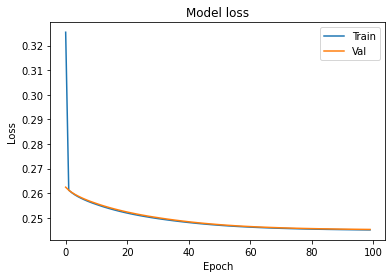

In [58]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

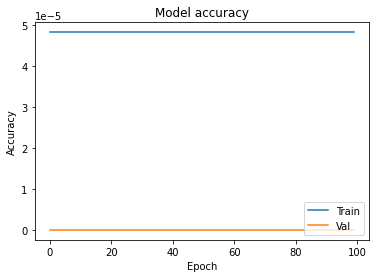

In [60]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()